In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import 'output_notebook()
from bokeh.plotting import figure, output_notebook, show
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
#from IPython.display import HTML

#https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

In [3]:
data=pd.read_csv(r"/kaggle/input/heart-disease-uci/heart.csv")
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#check the dimensions
data.shape

#check the total size
data.size


(303, 14)

4242

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

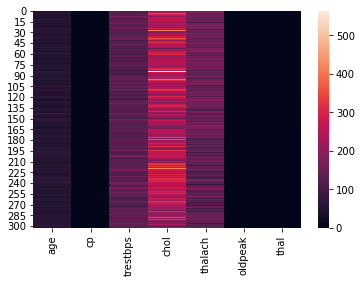

In [6]:
#check null values
data.isnull().sum()

#check null values using heatmap
sns.heatmap(data.drop(['sex','target','fbs',"restecg","exang","slope","ca"],axis=1))

<Figure size 1224x432 with 0 Axes>

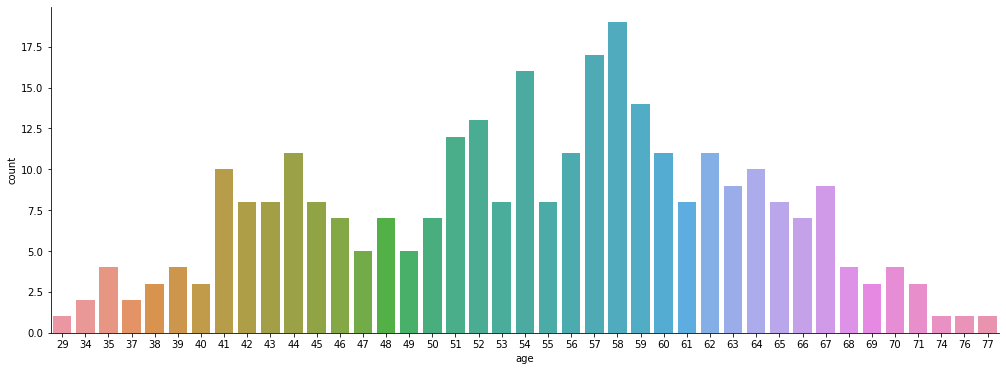

In [7]:
##Check which age group has more heartattacks
b=data.groupby(['age','target']).size()
#bf=pd.DataFrame(b,index="target")
plt.figure(figsize=(17,6))
sns.countplot('age',data=data)
sns.despine()
##dataset contains people with age 

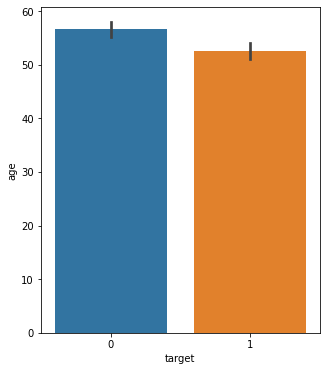

In [8]:
f,ax=plt.subplots(figsize=(5,6))
sns.barplot('target','age',data=data)
#sns.barplot('age','target',data=data)

<Figure size 1224x432 with 0 Axes>

Text(0.5, 1.0, 'Age and cholestrol with chestpain')

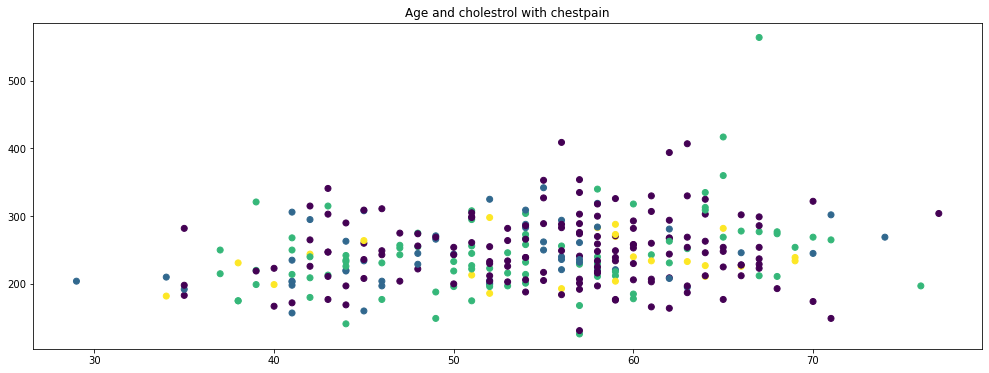

In [9]:
plt.figure(figsize=(17, 6))
#sns.catplot('age','chol',hue='target',data=data)
plt.scatter('age','chol',c='cp',data=data)
plt.title("Age and cholestrol with chestpain")
plt.xlabel=("Age")


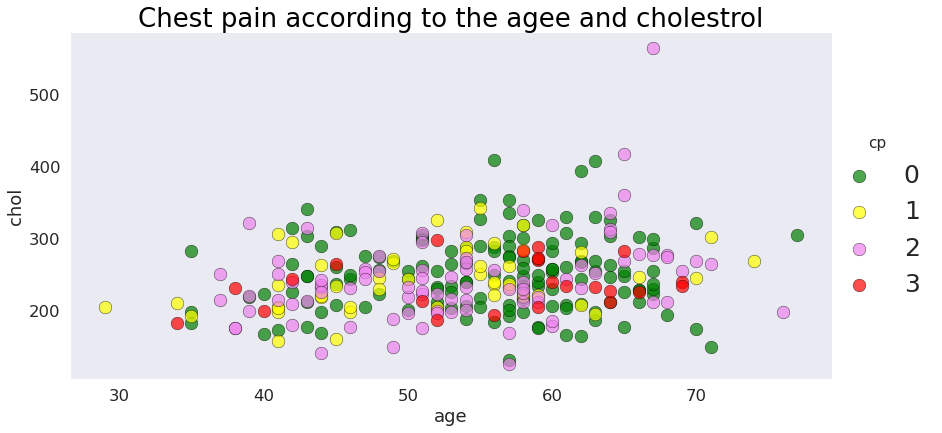

In [10]:
sns.set(font_scale=1.5)
pal= {0:'green',1:'yellow',2:'violet',3:'red'}
g = sns.FacetGrid(data, hue="cp",palette=pal,  height=6,aspect=2)##or palette==sns.color_palette('Set1') Set2 faltui
g.map(plt.scatter, "age", "chol", s=160, alpha=.7 ,linewidth=.5, edgecolor="black")
plt.grid(None)
plt.title("Chest pain according to the agee and cholestrol",fontsize=26,color='black')
g.add_legend(fontsize=25);
#plt.xlabel=('Age')


<Figure size 1008x1080 with 0 Axes>

<Figure size 1008x1080 with 0 Axes>

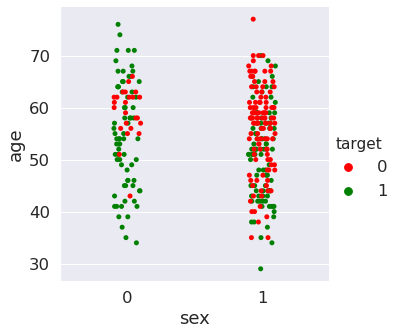

In [11]:
plt.figure(figsize=(14,15))
sns.catplot('sex','age',data=data,hue='target',palette=('red','green'))  ### we can see that 

Text(0.5, 1.0, 'Age and Cholestrol')

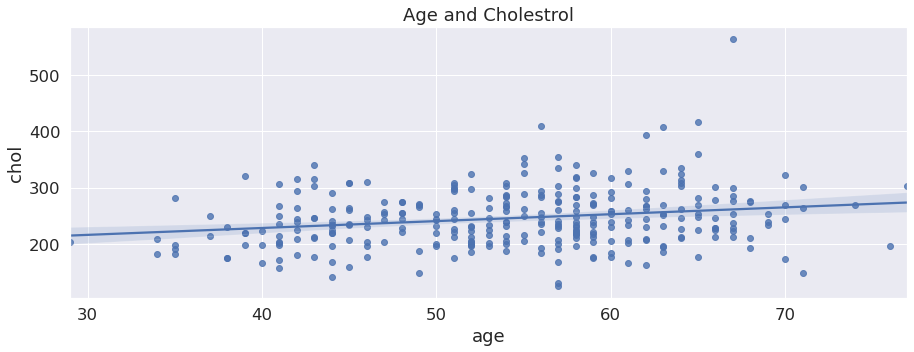

In [12]:
#reg plot
f,ax=plt.subplots(figsize=(15,5))
sns.regplot('age','chol',data)
plt.title("Age and Cholestrol")
plt.xlabel=("Sex")
plt.ylabel=("Cholestrol")


##relationship betwenn cholestrol level and age

<Figure size 3240x720 with 0 Axes>

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 3240x720 with 0 Axes>

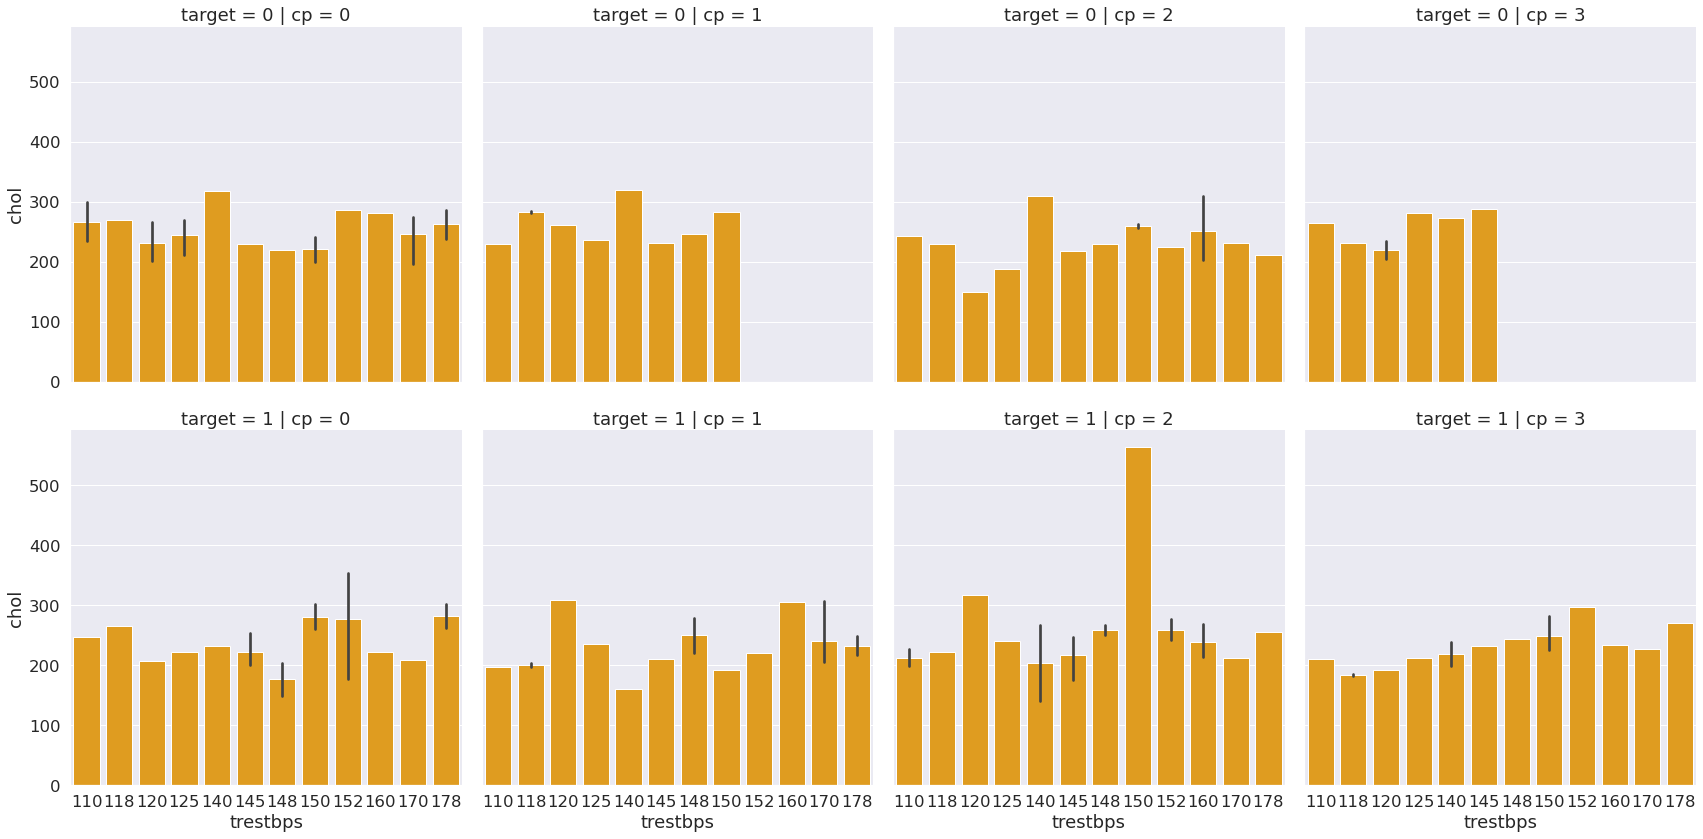

In [13]:
import matplotlib.pyplot
plt.figure(figsize=(45,10))

v=sns.FacetGrid(data,col='cp',row="target",height=6)
v.map(sns.barplot,"trestbps","chol",color="orange")


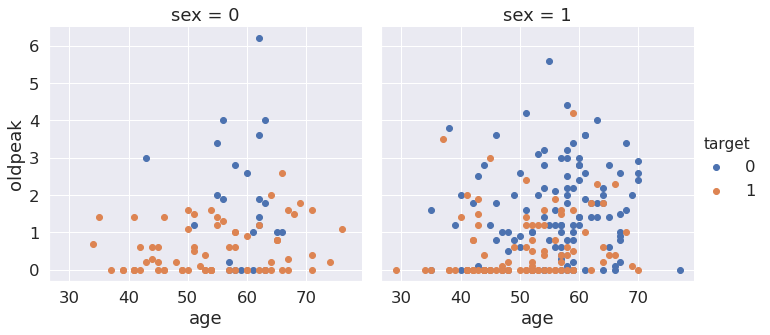

In [14]:
bins = np.arange(0, 65, 5)

g=sns.FacetGrid(data,col="sex",hue="target",height=5)
g.map(plt.scatter,"age","oldpeak")
g.add_legend()

[Text(0, 0.5, 'Cholestrol'),
 Text(0.5, 0, 'Chest pain on a rate of 0-3'),
 Text(0.5, 1.0, 'Chestpain for different cholestrol level')]

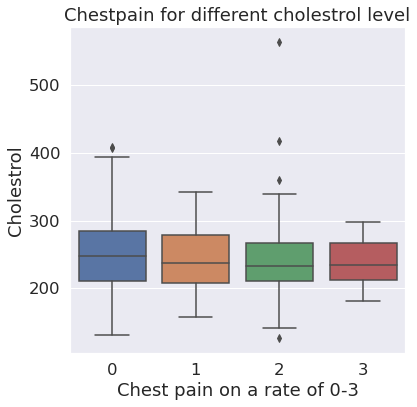

In [15]:
#fig,ax=plt.subplot(figsize=(5,6))
#sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(6,6))

sns.boxplot("cp",'chol',data=data).set(xlabel=("Chest pain on a rate of 0-3"),ylabel=("Cholestrol"),title="Chestpain for different cholestrol level")

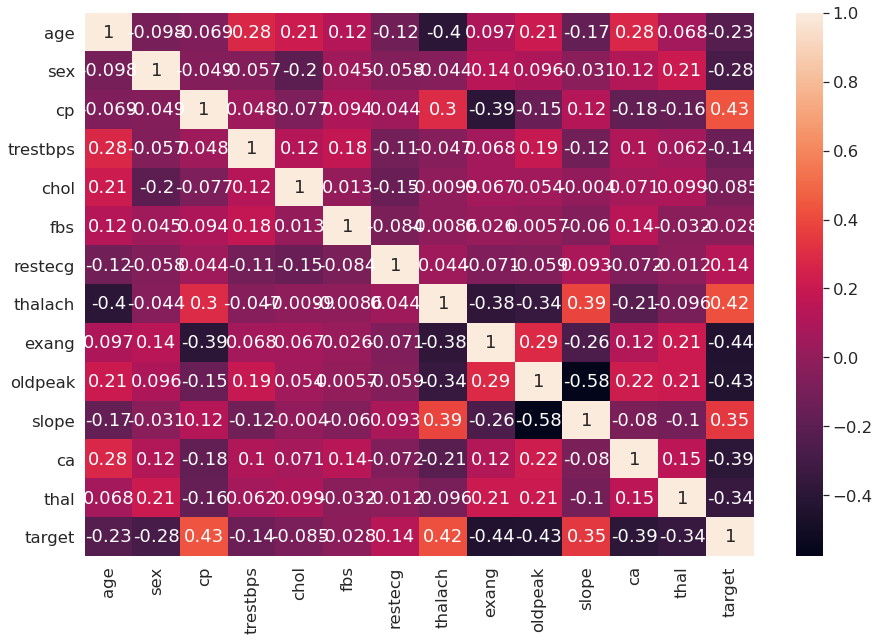

In [16]:
#Check the correlations between features 
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
c=data.corr()
sns.heatmap(c,annot=True)
#We can see that there is no high correlations between features i.e no multicoliinearity.As Multicollinearitybad

In [17]:
## 
train=data.drop('target',axis=1)
test=data[['target']]
test.head()
train.head()

,target
0,1
1,1
2,1
3,1
4,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2,random_state=4)


##logistic
model=linear_model.LogisticRegression(solver="newton-cg") ###solvers:'liblinear',lgfbs','newton-cg','sag','saga'
model.fit(x_train,y_train) 
model.predict(x_test)
m=model.predict(x_test)


###support vector
from sklearn.svm import SVC
model1=SVC()
model1.fit(x_train,y_train)
f=model.predict(x_test)
accuracy_score(f,y_test)

##Naive Bayes
from sklearn.naive_bayes import GaussianNB,BernoulliNB
bayes=GaussianNB().fit(x_train,y_train)
nb=bayes.predict(x_test)
accuracy_score(nb,y_test)


##accuracy score and other performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac=accuracy_score(m,y_test)
ac
##confusion matrix
print(confusion_matrix(y_test,m,labels=None))

#classification report
print(classification_report(m,y_test))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(solver='newton-cg')

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

0.9344262295081968

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8360655737704918

0.9344262295081968

[[22  3]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       0.97      0.92      0.95        38

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [19]:
###predicting probabilities
pb=model.predict_proba(x_test)
#pb[:,1]  ##positive outcomes
#pb[:,0]  ##negative outcomes

pb_table=pd.DataFrame(pb,index=None,columns=("Prob of 0","prob of 1"))
pb_table.head()



,Prob of 0,prob of 1
0,0.256675,0.743325
1,0.944441,0.055559
2,0.468712,0.531288
3,0.015678,0.984322
4,0.194930,0.805070


(array([0.        , 0.04347826, 1.        ]), array([0.        , 0.92105263, 1.        ]), array([2, 1, 0]))
Logistic: ROC AUC=0.956


(0.0, 1.0)

(0.0, 1.0)

[]

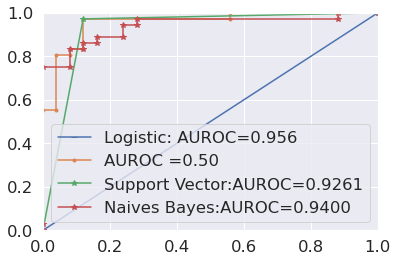

In [20]:
from sklearn.metrics import roc_auc_score,roc_curve
print(roc_curve(m,y_test))
#ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(y_test,pb[:,1])
print('Logistic: ROC AUC=%.3f' % (lr_auc))

norm=[0 for i in range(len(y_test))]
norm_auc=roc_auc_score(y_test,norm)
#norm_auc
fp,tp,thr=roc_curve(y_test,norm)


sup_auc=roc_auc_score(y_test,f)
fs,ts,th=roc_curve(y_test,f)


bay=bayes.predict_proba(x_test)
nb_auc=roc_auc_score(y_test,bay[:,1])
fn,tn,thn=roc_curve(y_test,bay[:,1])

##plotting roc curves
fpr,tpr,thresholds=roc_curve(y_test,pb[:,1])   ##roc_curve
plt.plot(fp,tp,marker="_",label="Logistic: AUROC=%.3f"%lr_auc)
plt.plot(fpr,tpr,marker=".",label="AUROC =%.2f" %norm_auc)
plt.plot(fs,ts,marker="*",label="Support Vector:AUROC=%.4f" %sup_auc)
plt.plot(fn,tn,marker="*",label="Naives Bayes:AUROC=%.4f" %nb_auc)
plt.xlim([0.0,1.0])
plt.ylim([0,1.0])
plt.xlabel=('False Positives')
plt.ylabel=("True Positives")
plt.plot()
plt.legend()
plt.show()